## Summary in code: section 1

### Generate random dataset in the unit interval

In [1]:
import numpy as np
np.random.seed(0)

numbDataPoints = 50
xs = np.random.uniform(0, 1, numbDataPoints)
print('xs = %s' % xs)

xs = [0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
 0.43758721 0.891773   0.96366276 0.38344152 0.79172504 0.52889492
 0.56804456 0.92559664 0.07103606 0.0871293  0.0202184  0.83261985
 0.77815675 0.87001215 0.97861834 0.79915856 0.46147936 0.78052918
 0.11827443 0.63992102 0.14335329 0.94466892 0.52184832 0.41466194
 0.26455561 0.77423369 0.45615033 0.56843395 0.0187898  0.6176355
 0.61209572 0.616934   0.94374808 0.6818203  0.3595079  0.43703195
 0.6976312  0.06022547 0.66676672 0.67063787 0.21038256 0.1289263
 0.31542835 0.36371077]


### Import all relevant functions and set value of $\tau$

In [2]:
from helperFunctions import *

In [3]:
binaryInitial = ''.join(map(decimalToBinary, xs))

necessaryPrecision = len(binaryInitial)
assert tau * len(xs) == necessaryPrecision

print('binaryInitial = %s\n' % binaryInitial)

print('number of bits = %d' % len(binaryInitial))

binaryInitial = 1000110010110111100110101000101101101100101001010111000011100100111101100110001011001010100001111001000111101100000100100001011000000101110101011100011111011110111110101100110001110110110001110001111010100011001001001111000110000101011010100100001111000110011101001001000100000100100111101001110010011101111100011010111001011100011011111011001000001111101010101010101100110101001000010101000001011101

number of bits = 400


In [4]:
mp.prec = necessaryPrecision #- (10 * tau)
print('significance = %d bits ; %d digits (base-10) ; ratio = %.3f\n' % (mp.prec, mp.dps, mp.prec / mp.dps))

decimalInitial = binaryToDecimal(binaryInitial)
print('decimalInitial = %s\n' % decimalInitial)

print('number of decimal digits = %d' % len(str(decimalInitial)))

significance = 400 bits ; 119 digits (base-10) ; ratio = 3.361

decimalInitial = 0.54967656997600557031692023623533087001234069741060222311124415152120668473990606828049163011967627260871299016527460728

number of decimal digits = 121


In [5]:
decodedValues = [float(dyadicDecoder(decimalInitial, _)) for _ in range(len(xs))]

### Compare data with ground truth and verify error bound

In [6]:
normalizedErrors = [abs(decodedValue - dataPoint) / (1 / 2 ** tau) 
                    for decodedValue, dataPoint in zip(decodedValues, xs)]

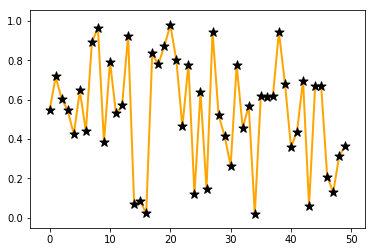

In [8]:
import matplotlib.pyplot as plt
from matplotlib import pyplot as mp

plt.plot(range(numbDataPoints), xs, color='orange', lw=2, zorder=1)
plt.scatter(range(numbDataPoints), decodedValues, color='black', marker='*', s=90, zorder=2);

mp.savefig('resources/codeExamples/decodedValues_dyadic.png')

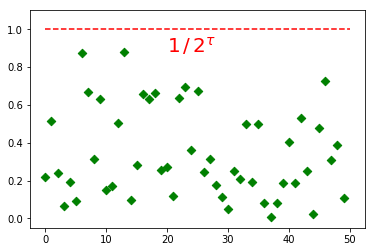

In [9]:
plt.scatter(range(numbDataPoints), normalizedErrors, color='green', marker='D')
plt.ylim(-0.05,1.1)
plt.hlines(1, 0, 50, color='red', linestyle='dashed')

plt.text(20, 0.88, r'$1 \, / \, 2^\tau$', fontsize=20, color='r');

mp.savefig('resources/codeExamples/normalizedError_dyadic.png')